# Sentiment Analysis on student feedback

### 1st Survey **(Student Experience Survey)**



## Importing & Authenticating

In [183]:
from google.colab import auth
auth.authenticate_user()

In [184]:
import numpy as np
import pandas as pd
import pandas_gbq
import matplotlib.pyplot as plt


In [185]:
# Reading table feedback_data from google BigQuery
Feedback_data = pandas_gbq.read_gbq(f'SELECT * FROM `surveyproject-378222.Capstone_Project.Feedback`',project_id='surveyproject-378222', dialect='standard') 

Downloading: 100%|██████████|


In [186]:
Feedback_data

,ID,Feedback
0,149,None
1,283,None
2,31,None
3,307,None
4,107,None
...,...,...
347,92,I am very disappointed with this program. The ...
348,196,I came to St. Clair college to gain experience...
349,114,I think there is a gap between the college off...
350,230,College should think of having 3 days per week...


# Data Preprocessing 

##1) Normalization

In [187]:
import re
fdk = Feedback_data
def  clean_text(df, text_field, new_text_field_name):
    df[new_text_field_name] = df[text_field].str.lower()
    df[new_text_field_name] = df[new_text_field_name].str.replace(r"@[A-Za-z0-9]+", "")  # remove Twitter usernames
    df[new_text_field_name] = df[new_text_field_name].str.replace(r"[^0-9A-Za-z \t]", "")  # remove non-alphanumeric characters
    df[new_text_field_name] = df[new_text_field_name].str.replace(r"http\S+", "")  # remove URLs
    df[new_text_field_name] = df[new_text_field_name].str.replace(r"^rt", "")  # remove retweet indicator
    df[new_text_field_name] = df[new_text_field_name].str.strip()  # remove leading/trailing whitespace 
    # remove numbers
    df[new_text_field_name] = df[new_text_field_name].str.replace('\d+', '') 
    return df
data_clean = clean_text(fdk , 'Feedback', 'text_clean')
data_clean.head()

<ipython-input-187-09e31bd14f19>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df[new_text_field_name] = df[new_text_field_name].str.replace(r"@[A-Za-z0-9]+", "")  # remove Twitter usernames
<ipython-input-187-09e31bd14f19>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df[new_text_field_name] = df[new_text_field_name].str.replace(r"[^0-9A-Za-z \t]", "")  # remove non-alphanumeric characters
<ipython-input-187-09e31bd14f19>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df[new_text_field_name] = df[new_text_field_name].str.replace(r"http\S+", "")  # remove URLs
<ipython-input-187-09e31bd14f19>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df[new_text_field_name] = df[new_text_field_name].str.replace(r"^rt", "")  # remove retweet indicator
<ipython-input-187-09e31bd14f19>:11: Futu

,ID,Feedback,text_clean
0,149,None,None
1,283,None,None
2,31,None,None
3,307,None,None
4,107,None,None


In [188]:
fdk


,ID,Feedback,text_clean
0,149,None,None
1,283,None,None
2,31,None,None
3,307,None,None
4,107,None,None
...,...,...,...
347,92,I am very disappointed with this program. The ...,i am very disappointed with this program the p...
348,196,I came to St. Clair college to gain experience...,i came to st clair college to gain experience ...
349,114,I think there is a gap between the college off...,i think there is a gap between the college off...
350,230,College should think of having 3 days per week...,college should think of having days per week ...


##2) Stop words

In [189]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
data_clean['text_clean'] = data_clean['text_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]) if x is not None else '')
data_clean.head()

#data_clean['text_clean'] = data_clean['text_clean'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,ID,Feedback,text_clean
0,149,None,
1,283,None,
2,31,None,
3,307,None,
4,107,None,


In [190]:
fdk

,ID,Feedback,text_clean
0,149,None,
1,283,None,
2,31,None,
3,307,None,
4,107,None,
...,...,...,...
347,92,I am very disappointed with this program. The ...,disappointed program professors seem expect st...
348,196,I came to St. Clair college to gain experience...,came st clair college gain experience meeting ...
349,114,I think there is a gap between the college off...,think gap college offering services students a...
350,230,College should think of having 3 days per week...,college think days per week also college follo...


##3) Tokenization

In [191]:
import nltk 
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
data_clean['text_tokens'] = data_clean['text_clean'].apply(lambda x: word_tokenize(x))
data_clean.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,ID,Feedback,text_clean,text_tokens
0,149,None,,[]
1,283,None,,[]
2,31,None,,[]
3,307,None,,[]
4,107,None,,[]


In [192]:
fdk

,ID,Feedback,text_clean,text_tokens
0,149,None,,[]
1,283,None,,[]
2,31,None,,[]
3,307,None,,[]
4,107,None,,[]
...,...,...,...,...
347,92,I am very disappointed with this program. The ...,disappointed program professors seem expect st...,"[disappointed, program, professors, seem, expe..."
348,196,I came to St. Clair college to gain experience...,came st clair college gain experience meeting ...,"[came, st, clair, college, gain, experience, m..."
349,114,I think there is a gap between the college off...,think gap college offering services students a...,"[think, gap, college, offering, services, stud..."
350,230,College should think of having 3 days per week...,college think days per week also college follo...,"[college, think, days, per, week, also, colleg..."


##4) Stemming

In [193]:
from nltk.stem import PorterStemmer 
def word_stemmer(Feedback):
    stem_text = [PorterStemmer().stem(i) for i in Feedback]
    return stem_text
data_clean['text_tokens_stem'] = data_clean['text_tokens'].apply(lambda x: word_stemmer(x))
data_clean.head()

,ID,Feedback,text_clean,text_tokens,text_tokens_stem
0,149,None,,[],[]
1,283,None,,[],[]
2,31,None,,[],[]
3,307,None,,[],[]
4,107,None,,[],[]


In [194]:
fdk

,ID,Feedback,text_clean,text_tokens,text_tokens_stem
0,149,None,,[],[]
1,283,None,,[],[]
2,31,None,,[],[]
3,307,None,,[],[]
4,107,None,,[],[]
...,...,...,...,...,...
347,92,I am very disappointed with this program. The ...,disappointed program professors seem expect st...,"[disappointed, program, professors, seem, expe...","[disappoint, program, professor, seem, expect,..."
348,196,I came to St. Clair college to gain experience...,came st clair college gain experience meeting ...,"[came, st, clair, college, gain, experience, m...","[came, st, clair, colleg, gain, experi, meet, ..."
349,114,I think there is a gap between the college off...,think gap college offering services students a...,"[think, gap, college, offering, services, stud...","[think, gap, colleg, offer, servic, student, a..."
350,230,College should think of having 3 days per week...,college think days per week also college follo...,"[college, think, days, per, week, also, colleg...","[colleg, think, day, per, week, also, colleg, ..."


##5) Lemmatization

In [195]:
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
def word_lemmatizer(Feedback):
    lem_text = [WordNetLemmatizer().lemmatize(i) for i in Feedback]
    return lem_text
data_clean['text_tokens_lemma'] = data_clean['text_tokens'].apply(lambda x: word_lemmatizer(x))
data_clean.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,ID,Feedback,text_clean,text_tokens,text_tokens_stem,text_tokens_lemma
0,149,None,,[],[],[]
1,283,None,,[],[],[]
2,31,None,,[],[],[]
3,307,None,,[],[],[]
4,107,None,,[],[],[]


In [196]:
fdk

,ID,Feedback,text_clean,text_tokens,text_tokens_stem,text_tokens_lemma
0,149,None,,[],[],[]
1,283,None,,[],[],[]
2,31,None,,[],[],[]
3,307,None,,[],[],[]
4,107,None,,[],[],[]
...,...,...,...,...,...,...
347,92,I am very disappointed with this program. The ...,disappointed program professors seem expect st...,"[disappointed, program, professors, seem, expe...","[disappoint, program, professor, seem, expect,...","[disappointed, program, professor, seem, expec..."
348,196,I came to St. Clair college to gain experience...,came st clair college gain experience meeting ...,"[came, st, clair, college, gain, experience, m...","[came, st, clair, colleg, gain, experi, meet, ...","[came, st, clair, college, gain, experience, m..."
349,114,I think there is a gap between the college off...,think gap college offering services students a...,"[think, gap, college, offering, services, stud...","[think, gap, colleg, offer, servic, student, a...","[think, gap, college, offering, service, stude..."
350,230,College should think of having 3 days per week...,college think days per week also college follo...,"[college, think, days, per, week, also, colleg...","[colleg, think, day, per, week, also, colleg, ...","[college, think, day, per, week, also, college..."


In [197]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# **Sentiment Analysis**





## The sentiment scores for each unique identifier

In [198]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd

# Instantiate the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Define a function to apply the sentiment analyzer to each row of text
def get_sentiment_score(text):
    text_str = ' '.join(text)
    return sia.polarity_scores(text_str)['compound']


# Drop the rows containing None values in the 'text_tokens_lemma' column
fdk = fdk.dropna(subset=['text_tokens_lemma'])

# Apply the function to the 'text_tokens_lemma' column and create a new column with the sentiment scores
fdk['sentiment_score'] = fdk['text_tokens_lemma'].apply(get_sentiment_score)

# Group the DataFrame by the unique identifier and calculate the mean sentiment score for each group
grouped = fdk.groupby('ID')['sentiment_score'].mean()

# Print the group-wise sentiment scores
for ID, score in grouped.items():
    if score > 0:
        print('The text with unique id {} has a positive sentiment score of {:.2f}.'.format(ID, score))
    elif score < 0:
        print('The text with unique id {} has a negative sentiment score of {:.2f}.'.format(ID, score))
    else:
        print('The text with unique id {} has a neutral sentiment score of {:.2f}.'.format(ID, score))


The text with unique id 1 has a negative sentiment score of -0.32.
The text with unique id 2 has a neutral sentiment score of 0.00.
The text with unique id 3 has a neutral sentiment score of 0.00.
The text with unique id 4 has a neutral sentiment score of 0.00.
The text with unique id 5 has a neutral sentiment score of 0.00.
The text with unique id 6 has a neutral sentiment score of 0.00.
The text with unique id 7 has a neutral sentiment score of 0.00.
The text with unique id 8 has a neutral sentiment score of 0.00.
The text with unique id 9 has a neutral sentiment score of 0.00.
The text with unique id 10 has a positive sentiment score of 0.03.
The text with unique id 11 has a neutral sentiment score of 0.00.
The text with unique id 12 has a neutral sentiment score of 0.00.
The text with unique id 13 has a negative sentiment score of -0.19.
The text with unique id 14 has a neutral sentiment score of 0.00.
The text with unique id 15 has a neutral sentiment score of 0.00.
The text with 

In [199]:
# Define a function to label each score as positive, negative, or neutral
def get_sentiment_label(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to the sentiment_score column to create three new columns
fdk['Positive Score'] = fdk['sentiment_score'].apply(lambda x: max(0, x))
fdk['Negative Score'] = fdk['sentiment_score'].apply(lambda x: min(0, x))
fdk['Neutral Score'] = fdk['sentiment_score'].apply(lambda x: 0 if x == 0 else None)



In [200]:
fdk

,ID,Feedback,text_clean,text_tokens,text_tokens_stem,text_tokens_lemma,sentiment_score,Positive Score,Negative Score,Neutral Score
0,149,None,,[],[],[],0.0000,0.0000,0.0000,0.0
1,283,None,,[],[],[],0.0000,0.0000,0.0000,0.0
2,31,None,,[],[],[],0.0000,0.0000,0.0000,0.0
3,307,None,,[],[],[],0.0000,0.0000,0.0000,0.0
4,107,None,,[],[],[],0.0000,0.0000,0.0000,0.0
...,...,...,...,...,...,...,...,...,...,...
347,92,I am very disappointed with this program. The ...,disappointed program professors seem expect st...,"[disappointed, program, professors, seem, expe...","[disappoint, program, professor, seem, expect,...","[disappointed, program, professor, seem, expec...",-0.4588,0.0000,-0.4588,NaN
348,196,I came to St. Clair college to gain experience...,came st clair college gain experience meeting ...,"[came, st, clair, college, gain, experience, m...","[came, st, clair, colleg, gain, experi, meet, ...","[came, st, clair, college, gain, experience, m...",0.5267,0.5267,0.0000,NaN
349,114,I think there is a gap between the college off...,think gap college offering services students a...,"[think, gap, college, offering, services, stud...","[think, gap, colleg, offer, servic, student, a...","[think, gap, college, offering, service, stude...",0.4019,0.4019,0.0000,NaN
350,230,College should think of having 3 days per week...,college think days per week also college follo...,"[college, think, days, per, week, also, colleg...","[colleg, think, day, per, week, also, colleg, ...","[college, think, day, per, week, also, college...",0.0000,0.0000,0.0000,0.0


## Sentiment Analysis with Sentiment Scores for Positive, Negative, and Neutral Texts

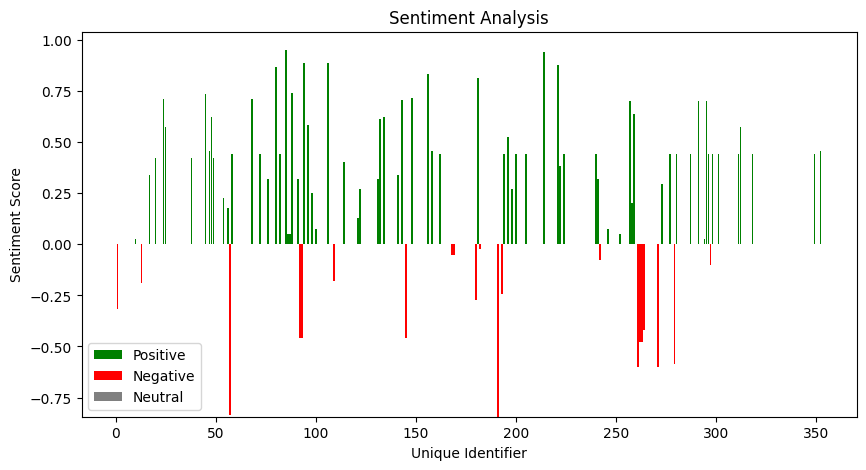

In [201]:
#Create a new DataFrame with the sentiment scores for positive, negative and neutral texts
sentiment_df = pd.DataFrame({
'positive': grouped[grouped > 0],
'negative': grouped[grouped < 0],
'neutral': grouped[grouped == 0]
})

#Sort the DataFrame by the index (i.e., the unique identifier)
sentiment_df = sentiment_df.sort_index()

#Plot the sentiment scores as a stacked bar chart
fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(sentiment_df.index, sentiment_df['positive'], color='green', label='Positive')
ax.bar(sentiment_df.index, sentiment_df['negative'], color='red', label='Negative')
ax.bar(sentiment_df.index, sentiment_df['neutral'], color='gray', label='Neutral', bottom=sentiment_df['negative'])

ax.set_xlabel('Unique Identifier')
ax.set_ylabel('Sentiment Score')
ax.set_title('Sentiment Analysis')
ax.legend() 

plt.show()

### Sentiment Analysis with Word Counts for Each Sentiment Label

In [202]:
import pandas as pd
from textblob import TextBlob


# Define a function to calculate the sentiment label for a given word
def get_sentiment_label(word):
    score = TextBlob(word).sentiment.polarity
    return 'Positive' if score > 0 else ('Negative' if score < 0 else 'Neutral')

# Apply the function to each word in the text_tokens_lemma column
sentiment_labels = []
for text in fdk['text_tokens_lemma']:
    sentence = ' '.join(text)  # Join the list of words back into a sentence
    for word in text:
        sentiment_labels.append((get_sentiment_label(word), word))

# Create a DataFrame with the sentiment label, the word, and its count
sentiment_counts = pd.DataFrame(sentiment_labels, columns=['sentiment', 'word']) \
    .groupby(['sentiment', 'word']) \
    .size() \
    .reset_index(name='count')

# Add a column for the total count of words with that sentiment
sentiment_counts['total_count'] = sentiment_counts.groupby('sentiment')['count'].transform('sum')

# Print the DataFrame
print(sentiment_counts)


    sentiment        word  count  total_count
0    Negative      active      1           56
1    Negative     average      1           56
2    Negative         bad      3           56
3    Negative      center      1           56
4    Negative   confusing      1           56
..        ...         ...    ...          ...
610  Positive       super      1          128
611  Positive  supportive      1          128
612  Positive      thanks      1          128
613  Positive       whole      1          128
614  Positive       worth      1          128

[615 rows x 4 columns]
